In [1]:
from empiricaldist import Pmf
import numpy as np
from utils import decorate
import matplotlib.pyplot as plt

In [2]:
def odds(p):
    return p / (1 - p)

def prob(o):
    return o / (1 + o)

odds(0.75), prob(3)

(3.0, 0.75)

Suppose there are two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. Now suppose you choose one of the bowls at random and, without looking, select a cookie at random. The cookie is vanilla. What is the probability that it came from Bowl 1?

In [3]:
prior_odds = 1
likelihood_ratio = (3/4) / (1/2)
post_odds = prior_odds * likelihood_ratio
post_odds, prob(post_odds)

(1.5, 0.6)

In [4]:
hypos = ['Bowl 1', 'Bowl 2']
prior = Pmf(1, hypos)
likelihood = [0.75, 0.5]
posterior = prior * likelihood
posterior.normalize()
posterior

,probs
Bowl 1,0.6
Bowl 2,0.4


### Exercise 6-1. 

Suppose that based on other evidence, your prior belief in Oliver’s guilt is 90%. How much would the blood evidence in this section change your beliefs? What if you ini‐ tially thought there was only a 10% chance of his guilt?

In [5]:
likes1 = 0.01
likes2 = 2 * 0.6 * 0.01
post_odds = odds(0.9) * likes1 / likes2
post_odds, prob(post_odds)

(7.500000000000002, 0.8823529411764706)

In [6]:
post_odds = odds(0.1) * likes1 / likes2
post_odds, prob(post_odds)

(0.09259259259259259, 0.0847457627118644)

In [7]:
def make_die(sides):
    outcomes = np.arange(1, sides+1)
    return Pmf(1/sides, outcomes)

In [8]:
die = make_die(6)
die

,probs
1,0.166667
2,0.166667
3,0.166667
4,0.166667
5,0.166667
6,0.166667


In [9]:
twice = die.add_dist(die)
twice

,probs
2,0.027778
3,0.055556
4,0.083333
5,0.111111
6,0.138889
7,0.166667
8,0.138889
9,0.111111
10,0.083333
11,0.055556


<Axes: >

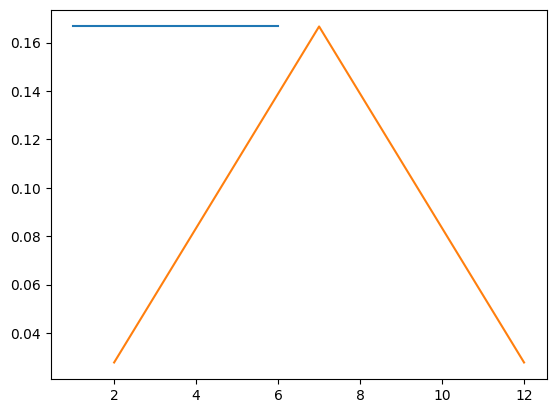

In [10]:
die.plot(label='die')
twice.plot(label='twice')

In [11]:
thrice = twice.add_dist(die)

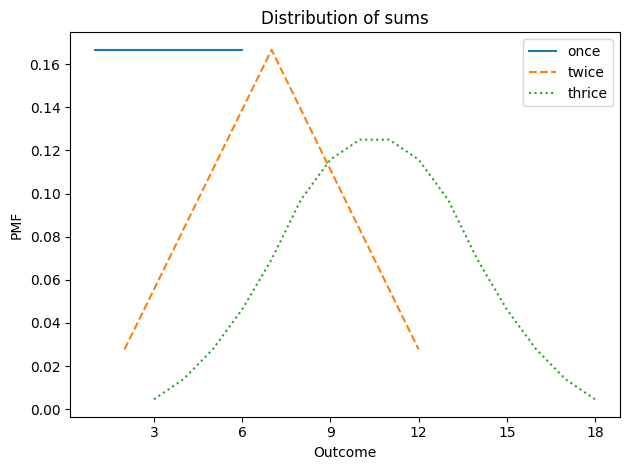

In [12]:
die.plot(label='once')
twice.plot(label='twice', ls='--')
thrice.plot(label='thrice', ls=':')
plt.xticks(np.arange(3, 19, 3))
decorate(xlabel='Outcome', ylabel='PMF', title='Distribution of sums')

In [13]:
from scipy.stats import binom
def make_binomial(n, p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)

In [14]:
n = 35
num_sensitive = 10
num_insensitive = n - num_sensitive
p_sensitive = 0.95
p_insensitive = 0.4
dist_sensitive = make_binomial(num_sensitive, p_sensitive)
dist_insensitive = make_binomial(num_insensitive, p_insensitive)
dist_total = dist_sensitive.add_dist(dist_insensitive)

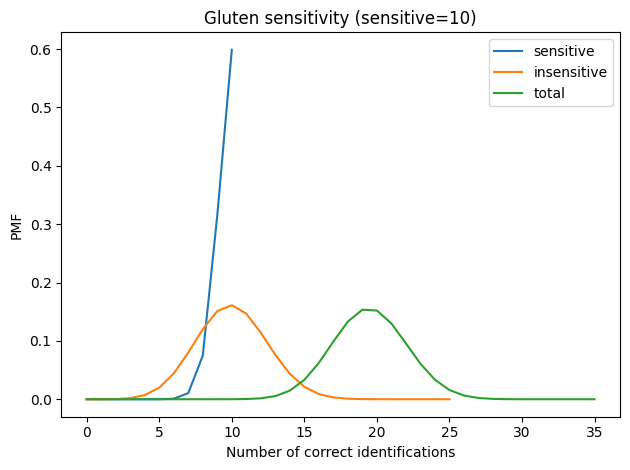

In [15]:
dist_sensitive.plot(label='sensitive')
dist_insensitive.plot(label='insensitive')
dist_total.plot(label='total')
decorate(xlabel='Number of correct identifications',
         ylabel='PMF',
         title='Gluten sensitivity (sensitive=10)')

In [16]:
import pandas as pd
table = pd.DataFrame()
n = 35
p_sensitive = 0.95
p_insensitive = 0.4
for num_sensitive in range(0, n+1):
    num_insensitive = n - num_sensitive
    dist_sensitive = make_binomial(num_sensitive, p_sensitive)
    dist_insensitive = make_binomial(num_insensitive, p_insensitive)
    dist_total = Pmf.add_dist(dist_sensitive, dist_insensitive)
    table[num_sensitive] = dist_total

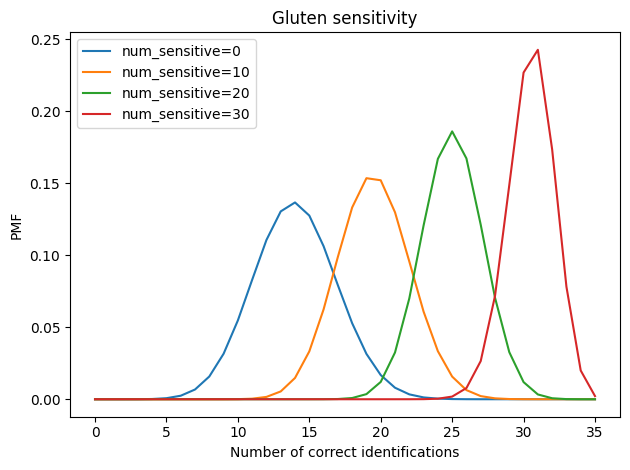

In [19]:
for i in [0, 10, 20, 30]:
    table[i].plot(label=f'num_sensitive={i}')
    decorate(xlabel='Number of correct identifications',
            ylabel='PMF',
            title='Gluten sensitivity')

In [22]:
hypos = np.arange(n+1)
prior = Pmf(1, hypos)
likelihood1 = table.loc[12]
posterior1 = prior * likelihood1
posterior1.normalize()

np.float64(0.4754741648615131)

In [23]:
likelihood2 = table.loc[20]
posterior2 = prior * likelihood2
posterior2.normalize()

np.float64(1.7818649765887378)

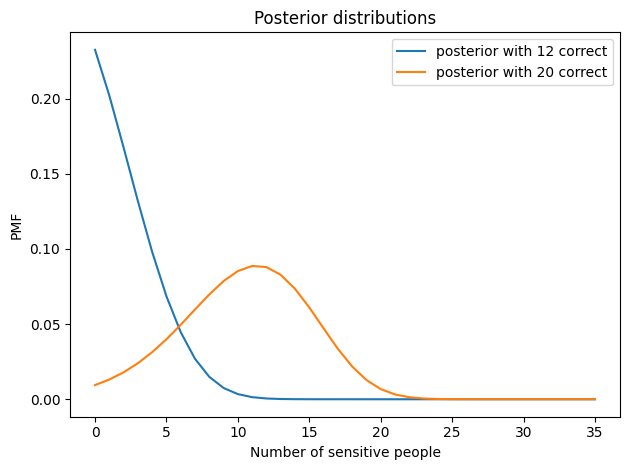

In [25]:
posterior1.plot(label='posterior with 12 correct')
posterior2.plot(label='posterior with 20 correct')
decorate(xlabel='Number of sensitive people',
         ylabel='PMF',
         title='Posterior distributions')

In [28]:
posterior1.max_prob(), posterior2.max_prob()

(np.int64(0), np.int64(11))

### Exercise 6-2. 

Let’s use Bayes’s rule to solve the Elvis problem from Chapter 3: 
> Elvis Presley had a twin brother who died at birth. What is the probability that Elvis was an identical twin? 

In 1935, about 2/3 of twins were fraternal and 1/3 were identical. The question con‐ tains two pieces of information we can use to update this prior. 

- First, Elvis’s twin was also male, which is more likely if they were identical twins, with a likelihood ratio of 2. 
- Also, Elvis’s twin died at birth, which is more likely if they were identical twins, with a likelihood ratio of 1.25. 

If you are curious about where those numbers come from, I wrote a blog post about it.

In [32]:
prior_odds = odds(1/3)
post_odds = prior_odds * 2 * 1.25
prob(post_odds)

0.5555555555555555

### Exercise 6-3. 

The following is an interview question that appeared on glassdoor.com, attributed to Facebook: 
> You’re about to get on a plane to Seattle. You want to know if you should bring an umbrella. You call 3 random friends of yours who live there and ask each independ‐ ently if it’s raining. Each of your friends has a 2/3 chance of telling you the truth and a 1/3 chance of messing with you by lying. All 3 friends tell you that “Yes” it is raining. What is the probability that it’s actually raining in Seattle? 

Use Bayes’s rule to solve this problem. As a prior you can assume that it rains in Seat‐ tle about 10% of the time. This question causes some confusion about the differences between Bayesian and fre‐ quentist interpretations of probability; if you are curious about this point, I wrote a blog article about it.

In [33]:
prior_odds = odds(0.1)
post_odds = prior_odds * 2 * 2 * 2
prob(post_odds)

0.4705882352941177

### Exercise 6-4. 

According to the CDC, people who smoke are about 25 times more likely to develop lung cancer than nonsmokers. 

Also according to the CDC, about 14% of adults in the US are smokers. If you learn that someone has lung cancer, what is the probability they are a smoker?

In [34]:
prior_odds = odds(0.14)
post_odds = prior_odds * 25
prob(post_odds)

0.8027522935779816

### Exercise 6-5. 

In Dungeons & Dragons, the amount of damage a goblin can withstand is the sum of two 6-sided dice. The amount of damage you inflict with a short sword is determined by rolling one 6-sided die. A goblin is defeated if the total damage you inflict is greater than or equal to the amount it can withstand. 

Suppose you are fighting a goblin and you have already inflicted 3 points of damage. What is your probability of defeating the goblin with your next successful attack? 

Hint: You can use Pmf.add_dist to add a constant amount, like 3, to a Pmf and Pmf.sub_dist to compute the distribution of remaining points.